# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2')
sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_1_2/lesson_2')

# optimizer

## SGD

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.25
                : 10. 正答率(テスト) = 0.1758
Generation: 20. 正答率(トレーニング) = 0.29
                : 20. 正答率(テスト) = 0.3011
Generation: 30. 正答率(トレーニング) = 0.3
                : 30. 正答率(テスト) = 0.4042
Generation: 40. 正答率(トレーニング) = 0.42
                : 40. 正答率(テスト) = 0.484
Generation: 50. 正答率(トレーニング) = 0.46
                : 50. 正答率(テスト) = 0.5367
Generation: 60. 正答率(トレーニング) = 0.59
                : 60. 正答率(テスト) = 0.5823
Generation: 70. 正答率(トレーニング) = 0.66
                : 70. 正答率(テスト) = 0.6127
Generation: 80. 正答率(トレーニング) = 0.62
                : 80. 正答率(テスト) = 0.6435
Generation: 90. 正答率(トレーニング) = 0.72
                : 90. 正答率(テスト) = 0.6648
Generation: 100. 正答率(トレーニング) = 0.64
                : 100. 正答率(テスト) = 0.6795
Generation: 110. 正答率(トレーニング) = 0.61
                : 110. 正答率(テスト) = 0.6955
Generation: 120. 正答率(トレーニング) = 0.76
                : 120. 正答率(テスト) = 0.706
Generation: 130. 正答率(トレーニング) = 0.68
                : 130. 正答率(テスト) = 0.7226
Generation

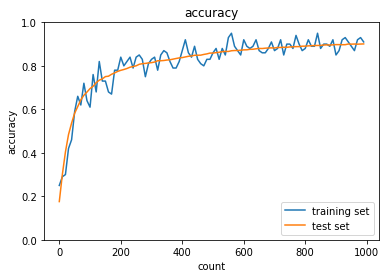

In [22]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
#use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='He',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.32
                : 10. 正答率(テスト) = 0.3278
Generation: 20. 正答率(トレーニング) = 0.43
                : 20. 正答率(テスト) = 0.458
Generation: 30. 正答率(トレーニング) = 0.65
                : 30. 正答率(テスト) = 0.7088
Generation: 40. 正答率(トレーニング) = 0.71
                : 40. 正答率(テスト) = 0.7718
Generation: 50. 正答率(トレーニング) = 0.77
                : 50. 正答率(テスト) = 0.7964
Generation: 60. 正答率(トレーニング) = 0.81
                : 60. 正答率(テスト) = 0.8265
Generation: 70. 正答率(トレーニング) = 0.84
                : 70. 正答率(テスト) = 0.8408
Generation: 80. 正答率(トレーニング) = 0.83
                : 80. 正答率(テスト) = 0.8459
Generation: 90. 正答率(トレーニング) = 0.89
                : 90. 正答率(テスト) = 0.8692
Generation: 100. 正答率(トレーニング) = 0.89
                : 100. 正答率(テスト) = 0.8752
Generation: 110. 正答率(トレーニング) = 0.86
                : 110. 正答率(テスト) = 0.8744
Generation: 120. 正答率(トレーニング) = 0.88
                : 120. 正答率(テスト) = 0.8781
Generation: 130. 正答率(トレーニング) = 0.86
                : 130. 正答率(テスト) = 0.8856
Generati

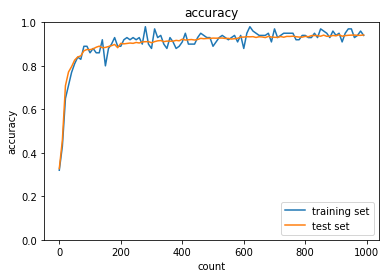

In [20]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='He',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## MomentumをもとにAdaGradを作ってみよう
θ = 1e-4 とする

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.08
                : 10. 正答率(テスト) = 0.0397
Generation: 20. 正答率(トレーニング) = 0.02
                : 20. 正答率(テスト) = 0.0297
Generation: 30. 正答率(トレーニング) = 0.03
                : 30. 正答率(テスト) = 0.0337
Generation: 40. 正答率(トレーニング) = 0.07
                : 40. 正答率(テスト) = 0.0628
Generation: 50. 正答率(トレーニング) = 0.09
                : 50. 正答率(テスト) = 0.0855
Generation: 60. 正答率(トレーニング) = 0.11
                : 60. 正答率(テスト) = 0.1041
Generation: 70. 正答率(トレーニング) = 0.08
                : 70. 正答率(テスト) = 0.117
Generation: 80. 正答率(トレーニング) = 0.12
                : 80. 正答率(テスト) = 0.1292
Generation: 90. 正答率(トレーニング) = 0.08
                : 90. 正答率(テスト) = 0.1459
Generation: 100. 正答率(トレーニング) = 0.15
                : 100. 正答率(テスト) = 0.1667
Generation: 110. 正答率(トレーニング) = 0.24
                : 110. 正答率(テスト) = 0.1801
Generation: 120. 正答率(トレーニング) = 0.23
                : 120. 正答率(テスト) = 0.1883
Generation: 130. 正答率(トレーニング) = 0.16
                : 130. 正答率(テスト) = 0.192
Generatio

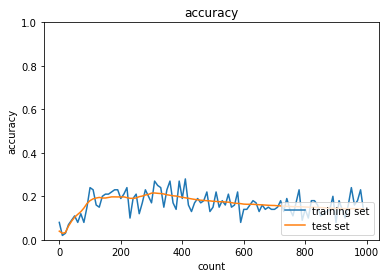

In [21]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='He',
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

#momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        else:
            h[key] += grad[key] * grad[key]      
        
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-4)

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSprop

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.0984
Generation: 20. 正答率(トレーニング) = 0.27
                : 20. 正答率(テスト) = 0.2173
Generation: 30. 正答率(トレーニング) = 0.4
                : 30. 正答率(テスト) = 0.2863
Generation: 40. 正答率(トレーニング) = 0.34
                : 40. 正答率(テスト) = 0.3426
Generation: 50. 正答率(トレーニング) = 0.44
                : 50. 正答率(テスト) = 0.364
Generation: 60. 正答率(トレーニング) = 0.47
                : 60. 正答率(テスト) = 0.371
Generation: 70. 正答率(トレーニング) = 0.41
                : 70. 正答率(テスト) = 0.3828
Generation: 80. 正答率(トレーニング) = 0.41
                : 80. 正答率(テスト) = 0.3842
Generation: 90. 正答率(トレーニング) = 0.53
                : 90. 正答率(テスト) = 0.4538
Generation: 100. 正答率(トレーニング) = 0.39
                : 100. 正答率(テスト) = 0.4943
Generation: 110. 正答率(トレーニング) = 0.46
                : 110. 正答率(テスト) = 0.5026
Generation: 120. 正答率(トレーニング) = 0.57
                : 120. 正答率(テスト) = 0.5088
Generation: 130. 正答率(トレーニング) = 0.71
                : 130. 正答率(テスト) = 0.5846
Generation

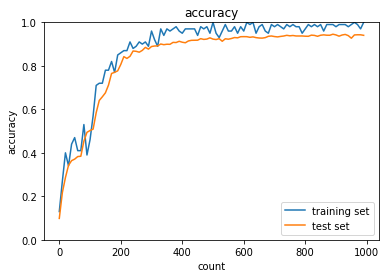

In [6]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1544
Generation: 30. 正答率(トレーニング) = 0.16
                : 30. 正答率(テスト) = 0.1931
Generation: 40. 正答率(トレーニング) = 0.25
                : 40. 正答率(テスト) = 0.2205
Generation: 50. 正答率(トレーニング) = 0.25
                : 50. 正答率(テスト) = 0.2364
Generation: 60. 正答率(トレーニング) = 0.27
                : 60. 正答率(テスト) = 0.2247
Generation: 70. 正答率(トレーニング) = 0.22
                : 70. 正答率(テスト) = 0.2276
Generation: 80. 正答率(トレーニング) = 0.3
                : 80. 正答率(テスト) = 0.3159
Generation: 90. 正答率(トレーニング) = 0.39
                : 90. 正答率(テスト) = 0.3319
Generation: 100. 正答率(トレーニング) = 0.31
                : 100. 正答率(テスト) = 0.3326
Generation: 110. 正答率(トレーニング) = 0.35
                : 110. 正答率(テスト) = 0.3609
Generation: 120. 正答率(トレーニング) = 0.44
                : 120. 正答率(テスト) = 0.4089
Generation: 130. 正答率(トレーニング) = 0.41
                : 130. 正答率(テスト) = 0.4186
Generati

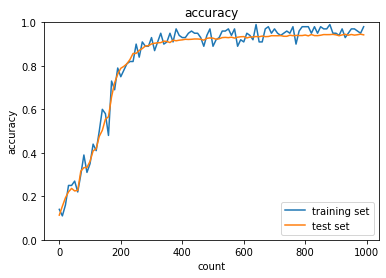

In [7]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] 学習率を変えてみよう
 * SGD、Momentumで実施、結果確認後0.01に戻した

## [try] 活性化関数と重みの初期化方法を変えてみよう
初期状態ではsigmoid - gauss<br>
activationはReLU、weight_init_stdは別の数値や'Xavier'・'He'に変更可能
 * SGD、MomentumでReLU・Heに変更

## [try] バッチ正規化をしてみよう
use_batchnormをTrueにしよう

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 * SGDでTrueに変更